## CA2 - Analyzing trends in Ireland's dairy exports and compararing them with major EU competitors

In [2]:
# Importing revelant libraries for the analysis 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans

In [4]:
# Exploratory Data analysis of the chosen dataset

In [5]:
df = pd.read_csv("Dairy Export.csv")

In [6]:
df.shape

(4895, 14)

In [7]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TI,Trade Indices,56,Belgium,94,Export Value Base Quantity,22241.01,Butter of cow milk,2012,2012,1000 USD,466034,E,Estimated value
1,TI,Trade Indices,56,Belgium,94,Export Value Base Quantity,22241.01,Butter of cow milk,2013,2013,1000 USD,557014,E,Estimated value
2,TI,Trade Indices,56,Belgium,94,Export Value Base Quantity,22241.01,Butter of cow milk,2014,2014,1000 USD,542433,E,Estimated value
3,TI,Trade Indices,56,Belgium,94,Export Value Base Quantity,22241.01,Butter of cow milk,2015,2015,1000 USD,402557,E,Estimated value
4,TI,Trade Indices,56,Belgium,94,Export Value Base Quantity,22241.01,Butter of cow milk,2016,2016,1000 USD,400687,E,Estimated value


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       4895 non-null   object 
 1   Domain            4895 non-null   object 
 2   Area Code (M49)   4895 non-null   int64  
 3   Area              4895 non-null   object 
 4   Element Code      4895 non-null   int64  
 5   Element           4895 non-null   object 
 6   Item Code (CPC)   4895 non-null   float64
 7   Item              4895 non-null   object 
 8   Year Code         4895 non-null   int64  
 9   Year              4895 non-null   int64  
 10  Unit              1958 non-null   object 
 11  Value             4895 non-null   int64  
 12  Flag              4895 non-null   object 
 13  Flag Description  4895 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 535.5+ KB


In [9]:
df.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4.895000e+03
mean,380.808989,334.000000,18308.146629,2017.000000,2017.000000,1.811506e+05
std,199.826997,195.573551,8642.617981,3.162601,3.162601,5.509007e+05
min,56.000000,94.000000,231.000000,2012.000000,2012.000000,5.000000e+00
25%,250.000000,95.000000,22130.020000,2014.000000,2014.000000,1.010000e+02
50%,372.000000,492.000000,22221.020000,2017.000000,2017.000000,1.340000e+02
75%,528.000000,494.000000,22251.010000,2020.000000,2020.000000,5.900000e+04
max,724.000000,495.000000,23993.030000,2022.000000,2022.000000,5.515968e+06


In [10]:
# checking for null values in the dataset
df.isnull().sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                2937
Value                  0
Flag                   0
Flag Description       0
dtype: int64

In [11]:
df["Item"].unique()

array(['Butter of cow milk', 'Cheese from whole cow milk', 'Eggs, dried',
       'Eggs, liquid', 'Hen eggs in shell, fresh', 'Raw milk of cattle',
       'Skim milk and whey powder', 'Skim milk, evaporated', 'Whey, dry',
       'Yoghurt'], dtype=object)

In [12]:
df["Area"].unique()

array(['Belgium', 'Denmark', 'France', 'Germany', 'Ireland', 'Italy',
       'Netherlands (Kingdom of the)', 'Poland', 'Spain'], dtype=object)

In [13]:
#Filter dataset for Ireland, France, and Germany, and specific products
filtered_data = df[
    (df['Area'].isin(['Ireland', 'France', 'Germany'])) & 
    (df['Item'].isin(['Butter of cow milk', 'Cheese from whole cow milk']))
]
print("Filtered Data Overview:")
print(filtered_data.head())


Filtered Data Overview:
     Domain Code         Domain  Area Code (M49)    Area  Element Code  \
1045          TI  Trade Indices              250  France            94   
1046          TI  Trade Indices              250  France            94   
1047          TI  Trade Indices              250  France            94   
1048          TI  Trade Indices              250  France            94   
1049          TI  Trade Indices              250  France            94   

                         Element  Item Code (CPC)                Item  \
1045  Export Value Base Quantity         22241.01  Butter of cow milk   
1046  Export Value Base Quantity         22241.01  Butter of cow milk   
1047  Export Value Base Quantity         22241.01  Butter of cow milk   
1048  Export Value Base Quantity         22241.01  Butter of cow milk   
1049  Export Value Base Quantity         22241.01  Butter of cow milk   

      Year Code  Year      Unit   Value Flag Flag Description  
1045       2012  2012  1000 

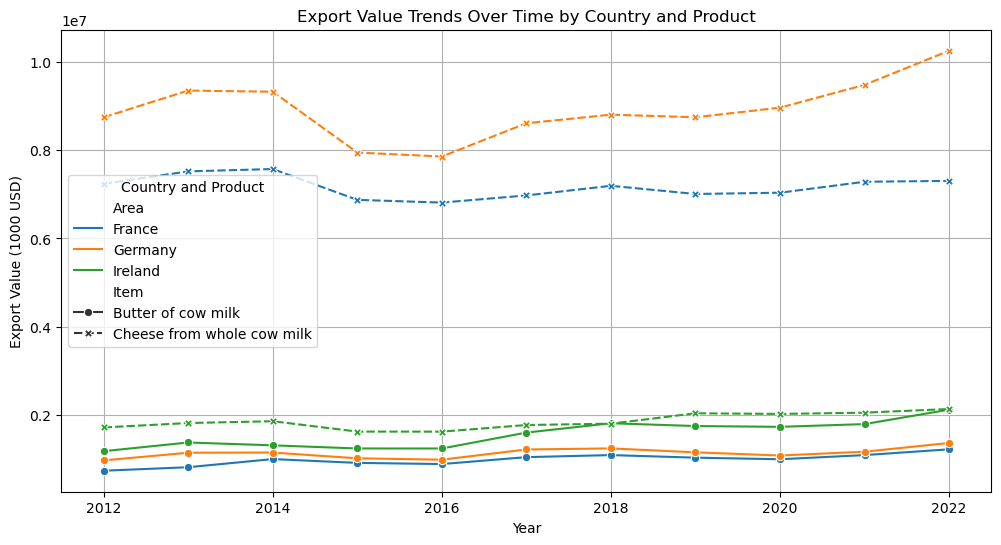

In [14]:
# Group data by country, year, and item for trend analysis
grouped_data = filtered_data.groupby(['Area', 'Year', 'Item'])['Value'].sum().reset_index()

# Visualize trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year', y='Value', hue='Area', style='Item', markers=True)
plt.title("Export Value Trends Over Time by Country and Product")
plt.ylabel("Export Value (1000 USD)")
plt.xlabel("Year")
plt.legend(title="Country and Product")
plt.grid(True)
plt.show()

### Statistical Testing

In [16]:
# Separate data for statistical testing
ireland_data = filtered_data[filtered_data['Area'] == 'Ireland']['Value']
france_data = filtered_data[filtered_data['Area'] == 'France']['Value']
germany_data = filtered_data[filtered_data['Area'] == 'Germany']['Value']

# Perform T-Test (Ireland vs France, Ireland vs Germany)
t_stat_france, p_value_france = ttest_ind(ireland_data, france_data)
t_stat_germany, p_value_germany = ttest_ind(ireland_data, germany_data)

# Perform ANOVA Test
anova_stat, anova_p = f_oneway(ireland_data, france_data, germany_data)

# Display results
print(f"T-Test Ireland vs France: t-stat={t_stat_france:.2f}, p-value={p_value_france:.5f}")
print(f"T-Test Ireland vs Germany: t-stat={t_stat_germany:.2f}, p-value={p_value_germany:.5f}")
print(f"ANOVA Test: F-stat={anova_stat:.2f}, p-value={anova_p:.5f}")

T-Test Ireland vs France: t-stat=-3.36, p-value=0.00091
T-Test Ireland vs Germany: t-stat=-3.83, p-value=0.00017
ANOVA Test: F-stat=7.29, p-value=0.00080


In [17]:
pip install streamlit plotly

Note: you may need to restart the kernel to use updated packages.


In [38]:
import streamlit as st
import plotly.express as px

# Streamlit Dashboard
st.title("Dairy Export Analysis Dashboard")

# Select product and country
selected_product = st.selectbox("Select Product", filtered_data['Item'].unique())
selected_country = st.selectbox("Select Country", ['Ireland', 'France', 'Germany'])

# Filter data
filtered_dashboard_data = filtered_data[
    (filtered_data['Item'] == selected_product) &
    (filtered_data['Area'] == selected_country)
]

# Visualize data
fig = px.line(filtered_dashboard_data, x='Year', y='Value', title=f"{selected_product} Export Trends in {selected_country}")
st.plotly_chart(fig)


DeltaGenerator()